#Creating a Sequential model using keras

**First importing the libreries.**
1. will use keras.model to import the Sequential() model.
2. isme Dropout layer use karenge to reduce the overfitting while thraining the model
3. Dense() layer ka use karenge to create the training layer
4. MNIST ka dataset use karenge to understand the model
5. model_to_dot use karenge to visualize the training

In [7]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import model_to_dot
import numpy as np

In [8]:
pip install livelossplot

**livelossplot** ka use karenge to plot the graph to visulaise.


**%matplotlib**
This function lets you activate matplotlib interactive support
at any point during an IPython session. It does not import anything
into the interactive namespace.



*   nrow or ncol 28 isiliye liya because jo mnist ki images hai usme 28*28 pixels hai
*   nclass 10 ka matlab hai ki jab ham label encoding karenge to 0-9 tak ke number ko encode karenge.





In [10]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline
nrow=28
ncol=28
nclass = 10
batch_size= 128
epo = 10

#data_summary
iska use data set to analyse karneme karenge

**Ab preprocessing karenge dataset ki**

In [11]:
def data_summary(X_train,y_train,X_test,y_test):
  print(X_train.shape)
  print(X_test.shape)
  print(y_train.shape)
  print(y_test.shape)

In [14]:
#Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#checking the data
data_summary(X_train,y_train,X_test,y_test)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [15]:
#Reshape data
X_train= X_train.reshape((X_train.shape[0],nrow*ncol)).astype('float32')/255
X_test= X_test.reshape((X_test.shape[0],nrow*ncol)).astype('float32')/255

In [16]:
#Categorically encoding labels
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

data_summary(X_train,y_train,X_test,y_test)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


#Model ko buid karenge

5 layers ka use kiya hai jisme :

1. ek input layer create ki using dense layer , usme 512 nodes create kiye and activation type 'relu': The **rectified linear activation** function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

2. thn we give input shape which is 784
3. thn dropout layer use kari to reduce overfiting and same layers or banai.
4. final layer me activation 'softmax' use kiya: The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

In [17]:
#Build Neural Network
model=models.Sequential()
model.add(Dense(512,activation='relu', input_shape=(nrow*ncol,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Compiling and training the data:
1. we use optimizer ( Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.) 'rmsprop'
2. epochs tells the number of itretions it needed.
3. Callback,validation_data use kiya hai to analise the accuracy and loss as a graph while the model trains


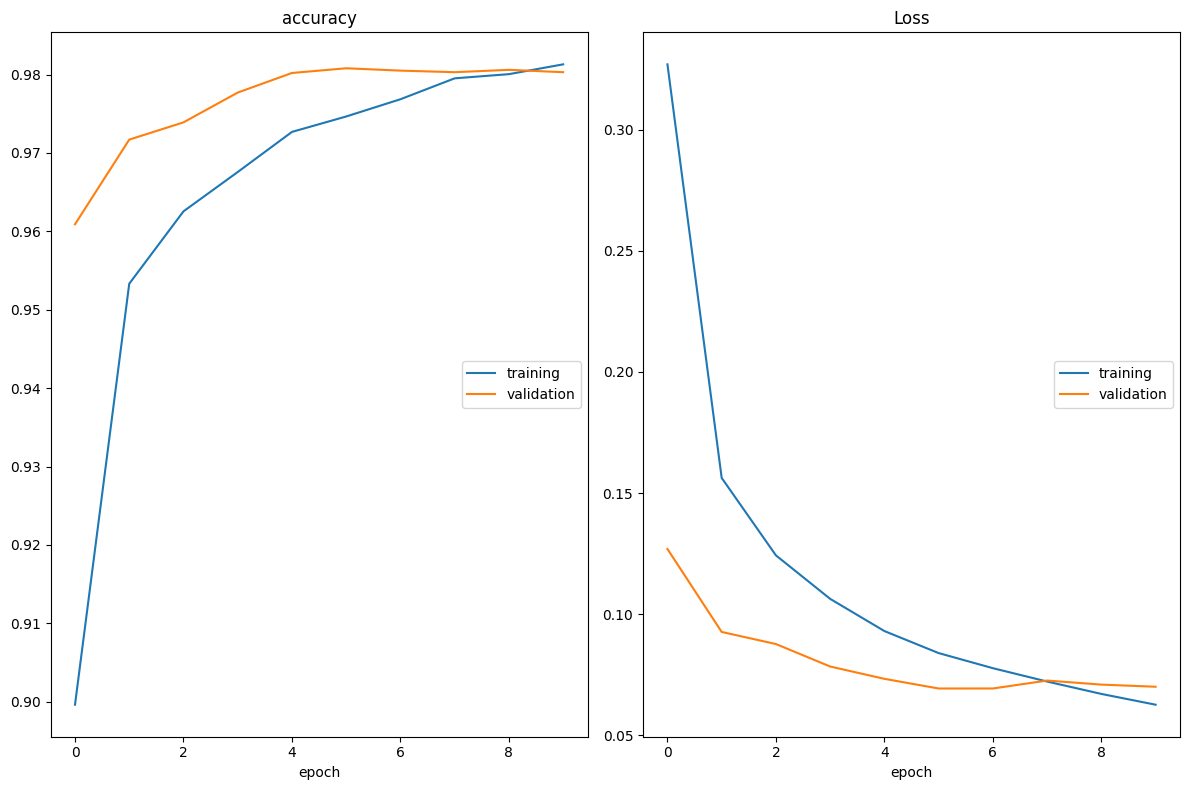

accuracy
	training         	 (min:    0.900, max:    0.981, cur:    0.981)
	validation       	 (min:    0.961, max:    0.981, cur:    0.980)
Loss
	training         	 (min:    0.063, max:    0.327, cur:    0.063)
	validation       	 (min:    0.069, max:    0.127, cur:    0.070)
469/469 [==============================] - 7s 15ms/step - loss: 0.0626 - accuracy: 0.9813 - val_loss: 0.0700 - val_accuracy: 0.9803
test loss : 0.07001445442438126
test accuracy : 0.9803000092506409


In [18]:
#Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#train model
model.fit(X_train, y_train,
          batch_size=128,
          epochs=epo,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test,y_test))

score = model.evaluate(X_test,y_test,verbose=0)
print('test loss :', score[0])
print('test accuracy :', score[1])

In [19]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
